In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow .keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [ ]:
dataset_path = '/content/drive/MyDrive/Dataset'
images=[]
labels=[]
list=os.listdir(dataset_path)
print("total classes detected:",len(list))
noofclasses=len(list)



total classes detected: 43


In [ ]:
count=0
for i in range(len(list)):
  piclist=os.listdir(dataset_path+"/"+str(i))
  for j in piclist:
    img=cv2.imread(dataset_path+"/"+str(count)+"/"+j)
    images.append(img)
    labels.append(count)
  print(count,end=" ")
  count+=1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

In [ ]:
images=np.array(images)
labels=np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(22271, 32, 32, 3)
(6960, 32, 32, 3)
(5568, 32, 32, 3)
(22271,)
(6960,)
(5568,)


In [ ]:
x_train=x_train/255
x_test=x_test/255
x_val=x_val/255
y_train=to_categorical(y_train,noofclasses)
y_test=to_categorical(y_test,noofclasses)
y_val=to_categorical(y_val,noofclasses)




In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([

    Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),


    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(noofclasses, activation='softmax')
])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 121s 169ms/step - accuracy: 0.3174 - loss: 2.5311 - val_accuracy: 0.9296 - val_loss: 0.2403
Epoch 2/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 144s 173ms/step - accuracy: 0.9041 - loss: 0.3111 - val_accuracy: 0.9815 - val_loss: 0.0773
Epoch 3/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 139s 169ms/step - accuracy: 0.9539 - loss: 0.1526 - val_accuracy: 0.9840 - val_loss: 0.0628
Epoch 4/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 141s 167ms/step - accuracy: 0.9652 - loss: 0.1135 - val_accuracy: 0.9883 - val_loss: 0.0442
Epoch 5/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 117s 169ms/step - accuracy: 0.9745 - loss: 0.0847 - val_accuracy: 0.9917 - val_loss: 0.0342
Epoch 6/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 141s 167ms/step - accuracy: 0.9774 - loss: 0.0707 - val_accuracy: 0.9907 - val_loss: 0.0316
Epoch 7/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 116s 167ms/step - accuracy: 0.9788 - loss: 0.0655 - val_accuracy: 0.9943 - val_loss: 0.0264
Epoch 8/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 144s 171ms/step - accuracy: 0.9805 -

In [ ]:
model.save('model.h5')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,070,819 (4.08 MB)

 Trainable params: 356,939 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 713,880 (2.72 MB)

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)


218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9957 - loss: 0.0132


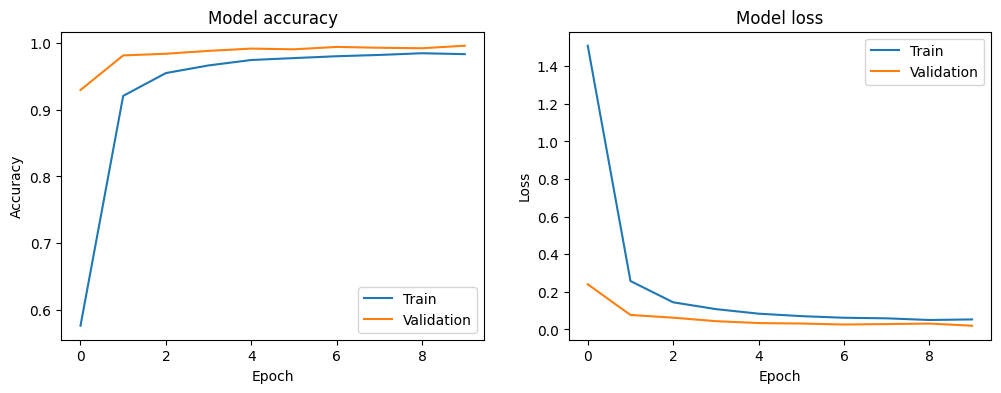

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

In [ ]:
predict=model.predict(x_test)

218/218 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step


In [ ]:
y_test=np.argmax(y_test,axis=1)
predict=np.argmax(predict,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,predict)
print(accuracy_score)

0.996264367816092


In [ ]:
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,predict)
print(classification_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.99      0.99       414
           2       1.00      0.99      0.99       413
           3       0.99      1.00      1.00       217
           4       1.00      1.00      1.00       338
           5       1.00      0.99      0.99       325
           6       1.00      0.99      0.99        75
           7       0.98      1.00      0.99       246
           8       0.99      1.00      0.99       237
           9       1.00      1.00      1.00       287
          10       1.00      1.00      1.00       371
          11       1.00      1.00      1.00       244
          12       1.00      1.00      1.00       365
          13       1.00      1.00      1.00       404
          14       1.00      1.00      1.00       156
          15       1.00      0.99      1.00       103
          16       1.00      1.00      1.00        62
          17       0.99    